In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.backends.backend_pdf import PdfPages
import scipy.odr as odr
from typing import Optional
from datetime import datetime

In [2]:
# Plot parameters

data_path = "data"
res_path = "res"

# font type and font size of the tick labels
font = "Arial"
font_size = 20
rotation = 45

#box color
palette = sns.color_palette(('#848484', '#62b190'))

#outlier symbol
flierprops = dict(marker= "x", markersize= '12')

#median color and width
medianprops=dict(color= 'gray', linewidth = 1)

#box width and linewidth
box_linewidth = 2
box_width = 0.9
boxprops=dict(alpha=.3)
# capprops = dict(color= 'k', linewidth = 1)
whiskerprops = dict(color= 'gray', linewidth = 1.5, alpha = 0.5)

#scatter
dot_size = 10
linewidth = 1


## Generate Figure 2

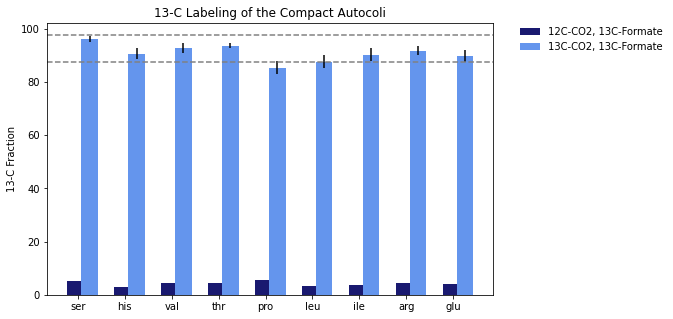

In [3]:
#insert here the file name and path

experiment_name = "DataS2-compact_evolved_Labeling_run_curated_peaks_summary"
plot_name = "figure2_labeling"

orig_file = f"{data_path}/{experiment_name}.xlsx"
dest_file = f"{res_path}/{plot_name}.svg"


strain_name = "Compact Autocoli"

data = pd.read_excel(orig_file)
#taking only the first 12 rows that are relevant for plot:
data = data.iloc[1:10]

#subsetting for relevant cols for 83 (compact Autocoli):
col_names = data.columns[data.columns.str.find("83") == 0].tolist()
df_83 = data[col_names]

#taking aa names for x axis
amino_acids = data.iloc[:,0].tolist()
#taking col of 13FOR and the mean of 3 rep. of 13CO2 of both exp. into same list:
CO2_13 = df_83.iloc[:,0:3].mean(axis=1)*100
FOR_13 = df_83.iloc[:,3]*100
#taking cols for error bars:
Error = df_83.iloc[:,0:3].std(axis=1)*100

X = np.arange(9)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
ax.bar(X + 0.00, FOR_13.tolist(), color = 'midnightblue', width = 0.45)
ax.bar(X + 0.25, CO2_13.tolist(), color = 'cornflowerblue', width = 0.35, yerr=Error )
ax.set_xticks(X)
ax.set_xticklabels(amino_acids)
ax.legend(labels=['12C-CO2, 13C-Formate', '13C-CO2, 13C-Formate'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
ax.set_ylabel('13-C Fraction')
ax.set_ylabel('13-C Fraction')
ax.set_title('13-C Labeling of the {}'.format(strain_name))
ax.axhline(y = 87.5, color = 'grey', linestyle = 'dashed')
ax.axhline(y = 97.625, color = 'grey', linestyle = 'dashed')
plt.rcParams["font.family"] = 'Arial'
    
plt.savefig(dest_file)


## Generate Figure 4

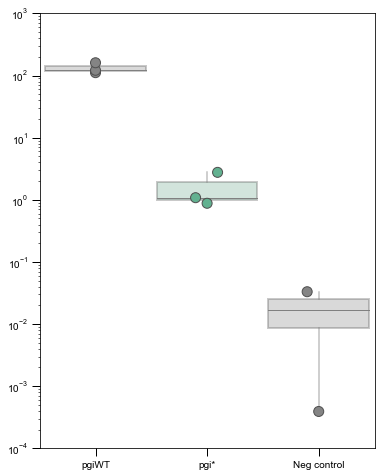

In [4]:
############ pgi KINETICS ##############

# Importing data
experiment_name = "DataS5-pgi_kinetic_assays_data"
plot_name = "figure4_pgi_kcat"

#fig size
fig_width= 6
fig_height= 8
ylim_low = 0.0001
ylim_high = 1000


orig_file = f"{data_path}/{experiment_name}.csv"
dest_file = f"{res_path}/{plot_name}.svg"

pgi_kcat_data = pd.read_csv(orig_file)
pgi_kcat_data = pgi_kcat_data.iloc[:,1:]

#creating data frame for plot
pgi_kcat_data_plot = pd.DataFrame()
pgi_kcat_data_plot = pgi_kcat_data[['pgiWT','pgi*','Neg control']]


fig = plt.figure(figsize=(fig_width,fig_height))

ax= sns.boxplot(
    data=pgi_kcat_data,
    showcaps=False,
    palette = palette,
    flierprops=flierprops,
    medianprops=medianprops,
    linewidth = box_linewidth,
    width = box_width,
    boxprops=boxprops,
#     capprops = capprops,
    whiskerprops = whiskerprops
    
)


ax= sns.swarmplot(
    data=pgi_kcat_data,
    palette = palette,
    size= dot_size,
    linewidth=linewidth
)

ax.set_ylim([ylim_low, ylim_high])
ax.set_yscale('log')
ax.tick_params(direction='out', length=8, width=1)
 
plt.rcParams["font.family"] = font
plt.rc('xtick', labelsize=font_size)    
plt.rc('ytick', labelsize=font_size) 
ax.tick_params(direction='out', length=8, width=1)

plt.savefig(dest_file)



Ttest_indResult(statistic=-2.950483449409881, pvalue=0.014522642529523636)


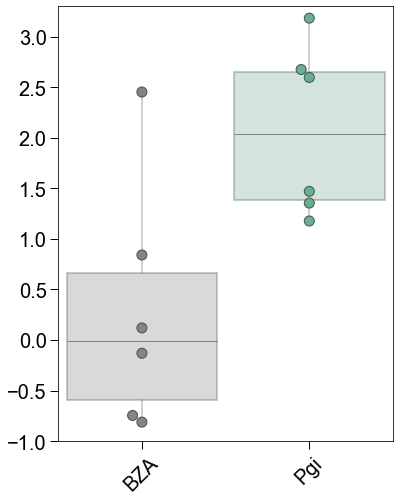

In [5]:
######### G6P to F6P ############

# Importing data
experiment_name = "DataS6-G6PvsF6PResults"
plot_name = "figure4_pgi_f6p_g6p_ratio"

#fig size
fig_width= 6
fig_height= 8
ylim_low = -1
ylim_high = 3.3


##########################################


orig_file = f"{data_path}/{experiment_name}.csv"
dest_file = f"{res_path}/{plot_name}.svg"

G6P_F6P_data = pd.read_csv(orig_file)
G6P_F6P_data = G6P_F6P_data.set_index('strain')

# F6P to G6P ratio
G6P_F6P_data['f6p/g6p ratio'] = G6P_F6P_data['f6p']/G6P_F6P_data['g6p']

# creating data frame for plot
values_boxplot_g6p_f6p= pd.DataFrame()
values_boxplot_g6p_f6p['BZA'] = G6P_F6P_data.loc['BZA','f6p/g6p ratio'].tolist()
values_boxplot_g6p_f6p['Pgi'] = G6P_F6P_data.loc['Pgi','f6p/g6p ratio'].tolist()

# normelizing  to BZA median and calculating log2
values_boxplot_g6p_f6p = np.log2(values_boxplot_g6p_f6p/np.median(values_boxplot_g6p_f6p['BZA']))


#calculating significance
t_test = stats.ttest_ind(values_boxplot_g6p_f6p['BZA'],values_boxplot_g6p_f6p['Pgi'])
print(t_test)
    
# plotting

fig = plt.figure(figsize=(fig_width,fig_height))

ax= sns.boxplot(
    data=values_boxplot_g6p_f6p,
    showcaps=False,
    palette = palette,
    flierprops=flierprops,
    medianprops=medianprops,
    linewidth = box_linewidth,
    width = box_width,
    boxprops=boxprops,
#     capprops = capprops,
    whiskerprops = whiskerprops
    
)

ax= sns.swarmplot(
    data=values_boxplot_g6p_f6p,
    palette = palette,
    size= dot_size,
    linewidth=linewidth
)

ax.set_ylim([ylim_low, ylim_high]) 
ax.tick_params(direction='out', length=8, width=1)
   
plt.rcParams["font.family"] = font
plt.rc('xtick', labelsize=font_size)    
plt.rc('ytick', labelsize=font_size)    
plt.xticks(rotation = rotation)

    

plt.savefig(dest_file)

S7P pval is 0.02368005604826848


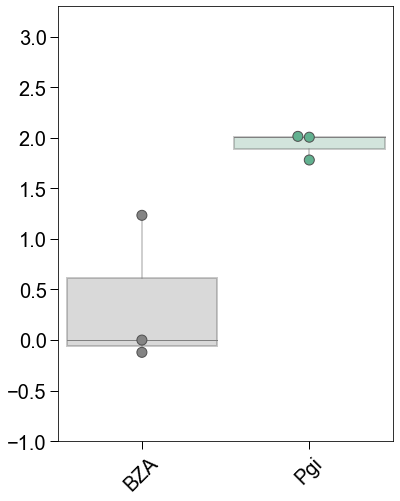

In [6]:
######### S7P  ############

# Importing data
experiment_name = "DataS7-PPP_metabolites"
plot_name = "figure4_s7p_foldchange"

#fig size
fig_width= 6
fig_height= 8
ylim_low = -1
ylim_high = 3.3


####################################################################################

orig_file = f"{data_path}/{experiment_name}.csv"
dest_file = f"{res_path}/{plot_name}.svg"

ppp_metabolites = pd.read_csv(orig_file)
ppp_metabolites = ppp_metabolites.set_index('strain')


##### creating data frame for S7P plot #####

values_boxplot_s7p_metabolites= pd.DataFrame()
values_boxplot_s7p_metabolites['BZA'] = ppp_metabolites.loc['BZA','Seduheptulose7-P'].tolist()
values_boxplot_s7p_metabolites['Pgi'] = ppp_metabolites.loc['Pgi','Seduheptulose7-P'].tolist()

# normelizing  to BZA median and calculating log2
values_boxplot_s7p_metabolites = np.log2(values_boxplot_s7p_metabolites/np.median(values_boxplot_s7p_metabolites['BZA']))


#calculating significance
t_test = stats.ttest_ind(values_boxplot_s7p_metabolites['BZA'],values_boxplot_s7p_metabolites['Pgi'])
print('S7P pval is', t_test.pvalue)
    
    
### plotting

fig = plt.figure(figsize=(fig_width,fig_height))

ax= sns.boxplot(
    data=values_boxplot_s7p_metabolites,
    showcaps=False,
    palette = palette,
    flierprops=flierprops,
    medianprops=medianprops,
    linewidth = box_linewidth,
    width = box_width,
    boxprops=boxprops,
#     capprops = capprops,
    whiskerprops = whiskerprops
    
)

ax= sns.swarmplot(
    data=values_boxplot_s7p_metabolites,
    palette = palette,
    size= dot_size,
    linewidth=linewidth
)

ax.set_ylim([ylim_low, ylim_high]) 
ax.tick_params(direction='out', length=8, width=1)
   
plt.rcParams["font.family"] = font
plt.rc('xtick', labelsize=font_size)    
plt.rc('ytick', labelsize=font_size)    
plt.xticks(rotation = rotation)

plt.savefig(dest_file)


P5P pval is 0.028684414326449317


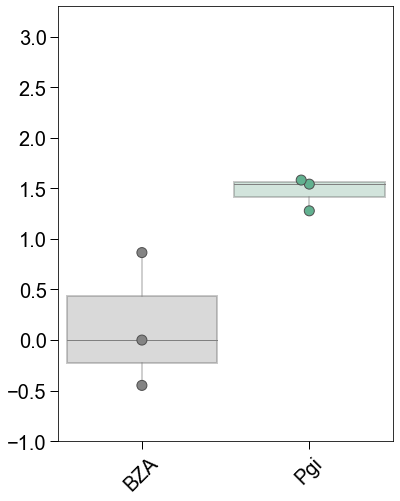

In [7]:
######### P5P  ############

# Importing data
experiment_name = "DataS7-PPP_metabolites"
plot_name = "figure4_p5p_foldchange"

#fig size
fig_width= 6
fig_height= 8
ylim_low = -1
ylim_high = 3.3


####################################################################################

orig_file = f"{data_path}/{experiment_name}.csv"
dest_file = f"{res_path}/{plot_name}.svg"

ppp_metabolites = pd.read_csv(orig_file)
ppp_metabolites = ppp_metabolites.set_index('strain')

##### creating data frame for P5P plot #####

values_boxplot_p5p_metabolites= pd.DataFrame()
values_boxplot_p5p_metabolites['BZA'] = ppp_metabolites.loc['BZA','Pentose-P'].tolist()
values_boxplot_p5p_metabolites['Pgi'] = ppp_metabolites.loc['Pgi','Pentose-P'].tolist()

# normelizing  to BZA median and calculating log2
values_boxplot_p5p_metabolites = np.log2(values_boxplot_p5p_metabolites/np.median(values_boxplot_p5p_metabolites['BZA']))


#calculating significance
t_test = stats.ttest_ind(values_boxplot_p5p_metabolites['BZA'],values_boxplot_p5p_metabolites['Pgi'])
print('P5P pval is', t_test.pvalue)

fig = plt.figure(figsize=(fig_width,fig_height))

ax= sns.boxplot(
    data=values_boxplot_p5p_metabolites,
    showcaps=False,
    palette = palette,
    flierprops=flierprops,
    medianprops=medianprops,
    linewidth = box_linewidth,
    width = box_width,
    boxprops=boxprops,
    whiskerprops = whiskerprops,
#     capprops = capprops
)

ax= sns.swarmplot(
    data=values_boxplot_p5p_metabolites,
    palette = palette,
    size= dot_size,
    linewidth=linewidth
)

ax.set_ylim([ylim_low, ylim_high]) 
ax.tick_params(direction='out', length=8, width=1)
    
plt.rcParams["font.family"] = font
plt.rc('xtick', labelsize=font_size)    
plt.rc('ytick', labelsize=font_size)    
plt.xticks(rotation = rotation)

plt.savefig(dest_file)


## Generate Figure 5

wt for vs. rpob crp for pval is 0.0010759550315501498


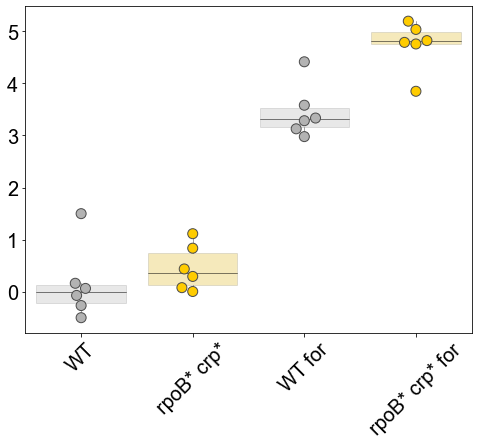

In [8]:
########### NADH/NAD############


# Importing data
experiment_name = "DataS12-rpoB_crp_metabolomics"
plot_name = "figure5_NADH_to_NAD_Box"

#fig size
fig_width= 8
fig_height= 6

# font type and font size of the tick labels
font = "Arial"
font_size = 20

#box color
palette = sns.color_palette(('#b3b3b3', '#ffcc00','#b3b3b3','#ffcc00'))

#median color
medianprops=dict(color= 'k')
#box width and linewidth
box_linewidth = 0.5
box_width = 0.8
boxprops=dict(alpha=.3)

#scatter
dot_size = 10
linewidth = 1


##########################################################################################################################

orig_file = f"{data_path}/{experiment_name}.csv"
dest_file = f"{res_path}/{plot_name}.svg"

NADH_NAD_data = pd.read_csv(orig_file)
NADH_NAD_data = NADH_NAD_data.set_index('strain')

# F6P to G6P ratio
NADH_NAD_data['NADH/NAD'] = NADH_NAD_data['NADH']/NADH_NAD_data['NAD']

# creating data frame for plot
values_boxplot_NADH_NAD= pd.DataFrame()
values_boxplot_NADH_NAD['WT'] = NADH_NAD_data.loc['wt','NADH/NAD'].tolist()
values_boxplot_NADH_NAD['rpoB* crp*'] = NADH_NAD_data.loc['rpob-crp','NADH/NAD'].tolist()
values_boxplot_NADH_NAD['WT for'] = NADH_NAD_data.loc['wt-form','NADH/NAD'].tolist()
values_boxplot_NADH_NAD['rpoB* crp* for'] = NADH_NAD_data.loc['rpob-crp-form','NADH/NAD'].tolist()

# normelizing  to BZA median and calculating log2
values_boxplot_NADH_NAD = np.log2(values_boxplot_NADH_NAD/np.median(values_boxplot_NADH_NAD['WT']))


#calculating significance
t_test = stats.ttest_ind(values_boxplot_NADH_NAD['WT for'],values_boxplot_NADH_NAD['rpoB* crp* for'])
print('wt for vs. rpob crp for pval is', t_test.pvalue)


# plotting
fig = plt.figure(figsize=(fig_width,fig_height))

ax= sns.boxplot(
    data=values_boxplot_NADH_NAD,
    showcaps=False,
    palette=palette,
    medianprops=medianprops,
    linewidth=box_linewidth,
    width=box_width,
    boxprops=boxprops

)

ax= sns.swarmplot(
    data=values_boxplot_NADH_NAD,
    palette = palette,
    size= dot_size,
    linewidth=linewidth
)
    
plt.rcParams["font.family"] = font
plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
plt.xticks(rotation = 45)

plt.savefig(dest_file)

# Generate supplamentry figure X

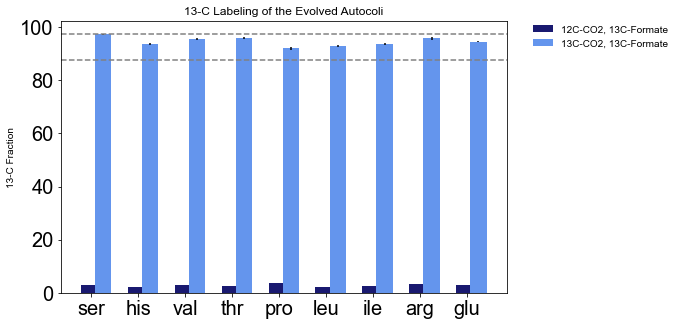

In [9]:
#insert here the file name and path

experiment_name = "DataS2-compact_evolved_Labeling_run_curated_peaks_summary"
plot_name = "figureS1_labeling"

orig_file = f"{data_path}/{experiment_name}.xlsx"
dest_file = f"{res_path}/{plot_name}.svg"


strain_name = "Evolved Autocoli"

data = pd.read_excel(orig_file)
#taking only the first 12 rows that are relevant for plot:
data = data.iloc[1:10]

#subsetting for relevant cols for 83 (compact Autocoli):
col_names = data.columns[data.columns.str.find("66") == 0].tolist()
df_66 = data[col_names]

#taking aa names for x axis
amino_acids = data.iloc[:,0].tolist()
#taking col of 13FOR and the mean of 3 rep. of 13CO2 of both exp. into same list:
CO2_13 = df_66.iloc[:,0:3].mean(axis=1)*100
FOR_13 = df_66.iloc[:,3]*100
#taking cols for error bars:
Error = df_66.iloc[:,0:3].std(axis=1)*100

X = np.arange(9)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
ax.bar(X + 0.00, FOR_13.tolist(), color = 'midnightblue', width = 0.45)
ax.bar(X + 0.25, CO2_13.tolist(), color = 'cornflowerblue', width = 0.35, yerr=Error )
ax.set_xticks(X)
ax.set_xticklabels(amino_acids)
ax.legend(labels=['12C-CO2, 13C-Formate', '13C-CO2, 13C-Formate'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
ax.set_ylabel('13-C Fraction')
csfont = {'fontname':'fantasy'}
ax.set_title('13-C Labeling of the {}'.format(strain_name))
ax.axhline(y = 87.5, color = 'grey', linestyle = 'dashed')
ax.axhline(y = 97.625, color = 'grey', linestyle = 'dashed')
plt.rcParams["font.family"] = 'Arial'
    
plt.savefig(dest_file)

# Generate supplamentry figure X

In [10]:
experiment_name1 = "Data S15 - Compact_AutoColi_log.csv"
experiment_name2 = 'Data S16 - Scaffoldless_Autocoli-log.csv'

plot_name1 = "Compact_growth" #for Compact plot
plot_name2 = "Engineered_growth" #for Engineered plot

orig_file1 = f"{data_path}/{experiment_name1}.xlsx"
orig_file2 = f"{data_path}/{experiment_name2}.xlsx"

dest_file1 = f"{res_path}/{plot_name1}.svg"
dest_file2 = f"{res_path}/{plot_name2}.svg"

# set the window length for smoothing and derivation (growth rate calculation) globally
# in order to have a fair comparison between the strains and conditions
WINLENGTH = 30
GR_WINLENGTH = 70


# defining functions to calculate time window, OD600, growth rates and plotting

def find_max_growth_rate(
    file_name: str,
    unit: int,
    title: str,
    start: int,
    end: int,
    calculated_initial_OD: Optional[float] = None,
) -> plt.Figure:
    """
        Arguments:
        file_name: str
            the name of the CSV file containing the raw data

        unit: int
            the bacteriology unit (either 1 or 3)

        title:
            the title of the experiment

        start: int 
            the start time of the growth curve you want to plot,
            in number of samples (#row in the table)

        end: int
            the end time of the growth curve you want to plot,
            in number of samples (#row in the table)
            
        calculate_initial_OD: float
            the OD600 that the experimentalist uses to innoculate the culture
    """
    data = pd.read_csv(file_name)
    
    # measured data and actual OD600
    df = select_OD_window(data=data, unit=unit, calculated_initial_OD=calculated_initial_OD, start=start, end=end)
    
    # claulate growth rates and plotting
    od = calc_growth_rate(df, winlength=WINLENGTH, gr_winlength=GR_WINLENGTH)
    
    # plot the growth curves
    return plot_growth_rate(od, title=title)


def select_OD_window(
    data: pd.DataFrame,
    unit: int,
    calculated_initial_OD: Optional[float] = None,
    start: int = 0,
    end: Optional[int] = None,
) -> pd.DataFrame:
    OD_column = f"ODAU{unit}.PV []"
        
    if not start:
        start = 0
    if not end:
        end = data.shape[0]
    data = data.loc[start:end,].copy()
    data['AU'] = data[OD_column]*2.7031 + 0.0075 # transformation from internal valuse to OD600
    if calculated_initial_OD is not None: # normalize the data so that the OD at t=0 is the calculated value
        data['AU'] += calculated_initial_OD - data['AU'].iat[0]

    data["Timestamp"] = pd.to_datetime(data.Timestamp, format="%m/%d/%y %H:%M:%S")
    data["time_in_hours"] = (data.Timestamp - data.Timestamp.iat[0]).apply(lambda x: x.total_seconds()/3600)
    return data


def calc_growth_rate(
    data: pd.DataFrame,
    winlength: int,
    gr_winlength: int,
) -> pd.DataFrame:
    
    def calc_slope(x):
        lin = lambda B,x: B[0]*x+B[1]
        fit = odr.ODR(data=odr.Data(x.index, x.values),model=odr.Model(lin), beta0=[0.,0.]).run()
        return fit.beta[0]
    
    od_ts = data.loc[~data['InoculationTime []'].isna(), :].set_index("time_in_hours")
    od_ts["smooth_OD"] = od_ts.AU.dropna().rolling(window=winlength, center=True).mean()
    od_ts["log2_OD"] = np.log2(od_ts.smooth_OD)
    od_ts["growth_rate"] = od_ts.log2_OD.dropna().rolling(window=gr_winlength, center=True).apply(calc_slope, raw=False)
    
    return od_ts


def plot_growth_rate(
    od_ts_smooth: pd.DataFrame,
    title: str,
    color: str = "maroon",
) -> plt.Figure:
    
    max_growth_rate = od_ts_smooth.growth_rate.max()
    max_OD = od_ts_smooth.smooth_OD.max()

    fig, axs = plt.subplots(3, 1, figsize=(4, 8), sharex=True, dpi=150)
    axs[0].plot(od_ts_smooth.index, od_ts_smooth.smooth_OD, label="smoothed", color=color)
    axs[1].plot(od_ts_smooth.index, od_ts_smooth.log2_OD, color=color)
    axs[2].plot(od_ts_smooth.index, od_ts_smooth.growth_rate, color=color)
    axs[0].set_ylabel('OD600')
    axs[1].set_title(f"$OD_{{max}}$ = {max_OD:.2f}")
    axs[1].set_ylabel('log2(OD)')
    axs[2].set_ylabel('growth rate [h$^{-1}$]')
    axs[2].set_xlabel('Time [h]')
    axs[0].set_title(title)
    axs[2].set_title(f"$\\mu_{{max}}$ = {max_growth_rate:.3f} 1/h")
    return fig

# plotting

fig1 = find_max_growth_rate(
    file_name = orig_file1,
    unit = 3,
    title = "Compact Autotrophic E.coli - rep.1",
    start = 7632,
    end = 8605,
)

plt.savefig(fig1, dest_file1)

fig2 = find_max_growth_rate(
    file_name = orig_file2,
    unit = 1,
    title = "Scaffoldless Autotrophic E.coli - rep.1",
    start = 7500,
    end = 'NA',
)

plt.savefig(fig2, dest_file2)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Data S15 - Compact_AutoColi_log.csv.xlsx'